In [1]:
from datetime import date, timedelta
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from src.core.repositories.stock_repository import get_repository, StockRepositoryConfig
from server.config import config as server_config
from src.core.lib.analysis.returns import returns

In [3]:
start = date.today() - timedelta(weeks=52)
end = date.today()

In [4]:
iex_config = server_config['sandbox']['iexcloud']
mysql_config = server_config['sandbox']['db']

In [5]:
repo = get_repository(iex_config=iex_config, mysql_config=mysql_config)

In [6]:
sbux = repo.historical_daily('SBUX', start=start, end=end)

In [7]:
sbux = returns(sbux)

In [8]:
sbux.head()

,id,symbol,high,low,open,close,volume,u_high,u_low,u_close,...,date,change,change_percent,change_over_time,market_change_over_time,resolution,timestamp,prev_close,return,log_return
0,2,SBUX,88.60,83.432,85.72,87.22,4585223,86.29,83.983,84.23,...,2020-09-22,0.061767,0.0007,0.000731,0.000732,daily,2021-09-20 16:37:19,NaN,NaN,NaN
1,3,SBUX,86.90,84.840,84.84,85.95,6489244,87.30,85.160,84.75,...,2020-09-23,-1.005530,-0.0115,-0.011038,-0.011042,daily,2021-09-20 16:37:19,87.22,-0.014561,-0.014668
2,4,SBUX,86.24,83.030,83.03,85.05,4931004,84.87,83.060,84.51,...,2020-09-24,0.050579,0.0006,-0.010325,-0.010578,daily,2021-09-20 16:37:19,85.95,-0.010471,-0.010526
3,5,SBUX,88.51,84.070,84.08,85.00,6075176,86.72,83.440,86.60,...,2020-09-25,1.297740,0.0158,0.005077,0.005055,daily,2021-09-20 16:37:19,85.05,-0.000588,-0.000588
4,6,SBUX,88.18,85.770,88.18,87.78,6105858,89.11,85.250,86.65,...,2020-09-28,1.792870,0.0220,0.027044,0.026024,daily,2021-09-20 16:37:19,85.00,0.032706,0.032182


In [9]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [10]:
df, loc, scale = t.fit(sbux['return'].astype(float).dropna())

In [11]:
p0 = sbux.iloc[-1]['close']
prices = [p0]
# simulate 100 days
for _ in range(100):
    r = t.rvs(df, loc, scale)
    p = prices[-1] * (1 + r)
    prices.append(p)

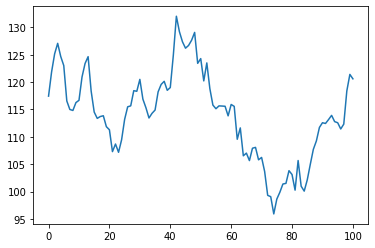

In [12]:
plt.plot(prices);